In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [69]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam_ham_dataset.csv")

In [70]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [71]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [72]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [73]:
data['Unnamed: 0'].unique()

array([ 605, 2349, 3624, ..., 2933, 1409, 4807])

In [74]:
data['label_num'].unique()

array([0, 1])

In [75]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('label_num',axis=1,inplace=True)

In [76]:
data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [77]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [78]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [79]:
data.columns = ['Type','Subject']

In [80]:
data

,Type,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [81]:
data['Type'].unique()

array(['ham', 'spam'], dtype=object)

In [82]:
data['Type'].value_counts()

ham     3672
spam    1499
Name: Type, dtype: int64

In [83]:
data.isnull().sum()

Type       0
Subject    0
dtype: int64

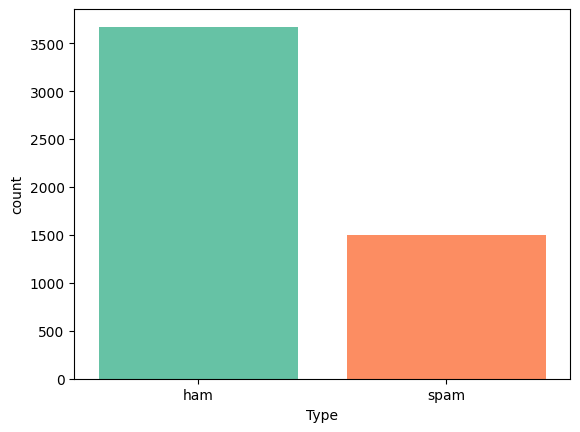

In [84]:
sns.countplot(data = data, x='Type' ,palette = "Set2" ,saturation=1)
plt.show()

In [85]:
data.duplicated().sum()

178

In [86]:
data.drop_duplicates()

,Type,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In [87]:
data.loc[data['Type'] == 'spam', 'Type',] = 0
data.loc[data['Type'] == 'ham', 'Type',] = 1
data

,Type,Subject
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,1,Subject: put the 10 on the ft\r\nthe transport...
5167,1,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,1,Subject: calpine daily gas nomination\r\n>\r\n...
5169,1,Subject: industrial worksheets for august 2000...


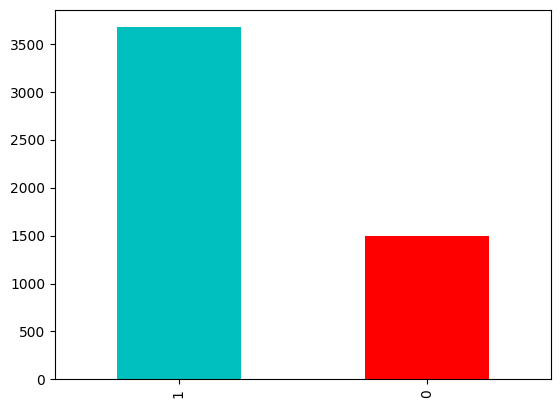

In [88]:
data['Type'].value_counts().plot(kind='bar',color=('c','r'))
plt.show()

In [89]:
def clean_string(string, reg = RegexpTokenizer(r'[a-z]+')):
    # converting string into lowercase
    string = string.lower()
    # tokenize the string on defined pattern
    tokens = reg.tokenize(string)
    # join the tokens with single space character and return the output
    return " ".join(tokens)

In [90]:
# Applying lambda function for changing the data of 'Subject' Column
data['Subject'] = data['Subject'].apply(lambda string: clean_string(string))

In [91]:
data

,Type,Subject
0,1,subject enron methanol meter this is a follow ...
1,1,subject hpl nom for january see attached file ...
2,1,subject neon retreat ho ho ho we re around to ...
3,0,subject photoshop windows office cheap main tr...
4,1,subject re indian springs this deal is to book...
...,...,...
5166,1,subject put the on the ft the transport volume...
5167,1,subject and following noms hpl can t take the ...
5168,1,subject calpine daily gas nomination julie as ...
5169,1,subject industrial worksheets for august activ...


In [92]:
x = data['Type']
y = data['Subject']
print(x)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: Type, Length: 5171, dtype: object


**Split the data as training data and testing data**

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train = X_train.astype('int')
X_test = X_test.astype('int')

**Feature Extraction**

In [94]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)
print(Y_train)

3628    subject meter scherlyn per our conversation he...
2491    subject natural gas nomination for enron metha...
3262    subject cleburne outage gentlemen i wanted to ...
2972    subject daren the firm trading waha book has b...
2481    subject re mon feb page loading image not show...
                              ...                        
4931    subject re pretty boy wants to meet his soulma...
3264    subject if you need to make money learn from t...
1653    subject find out where to buy drugs cheap find...
2607    subject job survey and matching heather darren...
2732    subject forwarded by tom acton corp enron on p...
Name: Subject, Length: 4136, dtype: object


**Perform Regression**

In [95]:
model = LogisticRegression()
model.fit(Y_train_featured,X_train)

LogisticRegression()

**Train Accuracy**

In [96]:
Prediction_on_train_data = model.predict(Y_train_featured)
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)
print(accuracy_on_train_data)

0.9963733075435203


**Test Accuracy**

In [97]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)
print(accuracy_on_test_data)

0.9874396135265701


In [98]:
data

,Type,Subject
0,1,subject enron methanol meter this is a follow ...
1,1,subject hpl nom for january see attached file ...
2,1,subject neon retreat ho ho ho we re around to ...
3,0,subject photoshop windows office cheap main tr...
4,1,subject re indian springs this deal is to book...
...,...,...
5166,1,subject put the on the ft the transport volume...
5167,1,subject and following noms hpl can t take the ...
5168,1,subject calpine daily gas nomination julie as ...
5169,1,subject industrial worksheets for august activ...


In [99]:
mail=[input("Enter your mail:")]
predict=feature_extraction.transform(mail)
final_prediction=model.predict(predict)
print(final_prediction)
if final_prediction[0]==1:
  print("Spam Mail")
else:
  print("Ham Mail")

Enter your mail:Congrats! You are selected for internship
[0]
Ham Mail
